<a href="https://colab.research.google.com/github/zidan1708/MyProjects/blob/main/Pemrosesan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [5]:
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 99% 729M/736M [00:08<00:00, 82.8MB/s]
100% 736M/736M [00:08<00:00, 89.2MB/s]


In [6]:
!unzip *.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [7]:
!ls

dataset  drive	eye-diseases-classification.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [10]:
from pathlib import Path
cataract = Path('/content/drive/MyDrive/archive/dataset/cataract')
diabetic_retinopathy = Path('/content/drive/MyDrive/archive/dataset/diabetic_retinopathy')
glaucoma = Path('/content/drive/MyDrive/archive/dataset/glaucoma')
normal = Path('/content/drive/MyDrive/archive/dataset/normal')



In [11]:
eye_disease_df = pd.DataFrame()
from tqdm import tqdm
for imagepath in tqdm(list(cataract.iterdir()), desc='cataract'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 0
    }, ignore_index=True)

for imagepath in tqdm(list(diabetic_retinopathy.iterdir()), desc='diabetic_retinopathy'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 1
    }, ignore_index=True)

for imagepath in tqdm(list(glaucoma.iterdir()), desc='glaucoma'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 2
    }, ignore_index=True)

for imagepath in tqdm(list(normal.iterdir()), desc='normal'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 3
    }, ignore_index=True)

data_frame = '/../dataset.pickle'
print(f'Saving Dataframe to: {data_frame}')
eye_disease_df.to_pickle(data_frame)

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-11-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-11-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-11-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-11-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-11-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and 

Saving Dataframe to: /../dataset.pickle


In [12]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
    print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

['normal', 'glaucoma', 'cataract', 'diabetic_retinopathy']


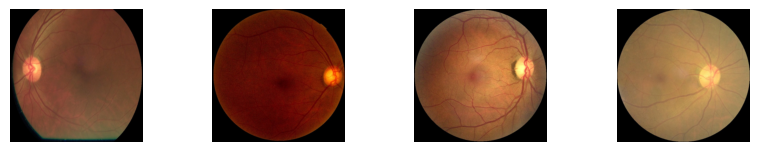

In [13]:
data,result = load_images("/content/drive/MyDrive/archive/dataset/")

In [14]:
print(np.array(data))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [15]:
t = pd.Series(result,dtype='category').cat.codes

In [16]:
t.value_counts()

1    1108
3    1074
0    1038
2    1017
dtype: int64

In [17]:
t.value_counts()

1    1108
3    1074
0    1038
2    1017
dtype: int64

###Handling Data Duplicate

In [18]:
t = t.drop_duplicates()

In [19]:
df = pd.DataFrame(t)

In [20]:
df

,0
0,3
1074,2
2091,0
3129,1


###Labelling


Label Kolom

In [21]:
df = pd.DataFrame(t, columns = ['kelas'])

In [22]:
df

,kelas
0,3
1074,2
2091,0
3129,1


Label Class

In [23]:
df = df['kelas'].map({3:'normal', 2:'glaucoma', 1:'diabetic_retinopathy', 0:'cataract'})

In [24]:
df

0                     normal
1074                glaucoma
2091                cataract
3129    diabetic_retinopathy
Name: kelas, dtype: object

###Membangun Model

In [39]:
epochs = 10
learning_rate = 0.001
retrain = False

In [40]:
from torch import Tensor
from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential, functional, Sigmoid)
import torch
import torch.nn.init as init
import torch.nn as nn




In [41]:
class EyeDiseaseClassification(nn.Module):
    def __init__(self):
        super(EyeDiseaseClassification, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(32,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(32,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(64,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(64,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1,inplace=False),
            nn.Linear(8 * 8 * 64, 1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1,inplace=False),
            nn.Linear(512, 4)
        )
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

eye_disease_cnn = EyeDiseaseClassification()
print(eye_disease_cnn)


EyeDiseaseClassification(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (

In [42]:
from PIL import Image
import numpy as np
from torch import long, tensor
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, RandomOrder

class Eye_Class(Dataset):
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        self.transformations = Compose([
            Resize((32, 32)),
            ToTensor(),
            Normalize((0.5667, 0.5198, 0.4955),(0.229, 0.224, 0.225))
        ])

    def __getitem__(self, key):
        if isinstance(key, slice):
            raise NotImplementedError('Slicing Supported..')

        row_loc = self.dataFrame.iloc[key]
        image_rgb = Image.open(row_loc['image']).convert('RGB')
        #image = (image - mean) / std
        #print(image)
        return {
          'image': self.transformations(image_rgb),
          'eye_disease_type': tensor([row_loc['eye_disease_type']], dtype=long),
          'path': row_loc['image']
        }

    def __len__(self):
        return len(self.dataFrame.index)

In [44]:
from sklearn.model_selection import KFold
from typing import Dict, List, Union
import pandas as pd
import torch
import torch.nn.init as init
from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential, MSELoss, L1Loss)
from torch.optim import Adam
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
import itertools

def prepare_data(eye_disease_df) -> None:
        eye_disease_dataframe = pd.read_pickle(eye_disease_df)
        print(eye_disease_dataframe['eye_disease_type'].value_counts())
        k_fold = KFold(n_splits=10, shuffle=True)
        training_folds = []
        validation_folds = []
        for training_index, validation_index in k_fold.split(eye_disease_dataframe, eye_disease_dataframe['eye_disease_type']):
            training_folds.append(Eye_Class(eye_disease_dataframe.iloc[training_index]))
            validation_folds.append(Eye_Class(eye_disease_dataframe.iloc[validation_index]))
        return [
            training_folds, validation_folds,CrossEntropyLoss()
            ]

def training_dataloader(train_df) -> DataLoader:
    return DataLoader(train_df, batch_size=32, shuffle=True, num_workers=0)
def validation_dataloader(validate_df) -> DataLoader:
    return DataLoader(validate_df, batch_size=32, num_workers=0)

training_dfs, validation_dfs, cross_entropy_loss = prepare_data('/../dataset.pickle')
training_dfs

1    1108
3    1074
0    1038
2    1017
Name: eye_disease_type, dtype: int64


In [45]:
import warnings
warnings.filterwarnings('ignore')
accuracyvalues = []
training_loss = []

def train_model(train_fold):
    account_list, loss_value_list = ([] for i in range (2))
    optimizer = Adam(eye_disease_cnn.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        total, correct, loss_train = 0, 0, 0.0
        for j, data in enumerate(training_dataloader(train_fold), 0):
            inputs = data['image']
            labels  = data['eye_disease_type']
            labels = labels.flatten()
            outputs = eye_disease_cnn(inputs)
            loss = cross_entropy_loss(outputs, labels)
            loss_value_list.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #training accuracy
            total += labels.size(0)
            _, predicted_values = torch.max(outputs.data, 1)
            correct += (predicted_values == labels).sum().item()
            loss_train += loss
        print('Training Loss after epoch {} : {} Accuracy: {:.2f}%'.format(epoch, loss_train,(correct / total) * 100))
        accuracyvalues.append((correct / total) * 100)
        training_loss.append(loss_train.detach().numpy())

In [46]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate_model(validate_fold):
    prediction_values, actual_values = torch.tensor([]), torch.tensor([])
    for i, data in enumerate(validation_dataloader(validate_fold)):
        inputs, targets = data['image'], data['eye_disease_type']
        targets = targets.flatten()
        output = eye_disease_cnn(inputs)
        output = torch.argmax(output,axis=1)
        prediction_values = torch.cat((prediction_values, output.flatten()), dim=0)
        actual_values = torch.cat((actual_values, targets), dim=0)

    return (confusion_matrix(actual_values.numpy(), prediction_values.numpy()),accuracy_score(actual_values, prediction_values),*precision_recall_fscore_support(actual_values.numpy(), prediction_values.numpy(),average='macro'))

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
fold_outputs = []
fold_con_matrix = np.zeros((4,4))
classes = ['cataract','diabetic_retinopathy','glaucoma','normal']

for fold in range(len(training_dfs)):
    print("Running Fold : "+ str(fold+1))
    print(training_dfs[fold])
    train_model(training_dfs[fold])
    fold_result = evaluate_model(validation_dfs[fold])
    #conf_mat, acc, pre, recall, f-score
    fold_outputs.append(fold_result[1:-1])
    fold_con_matrix = np.add(fold_con_matrix,fold_result[0])
    if fold != len(training_dfs)-1:
        eye_disease_cnn = EyeDiseaseClassification()

report = pd.DataFrame(fold_outputs, columns=['accuracy', 'precision', 'recall', 'f1 - score'])
print()
print("Classification Report")
print(report.mean())
print()

Running Fold : 1
Training Loss after epoch 0 : 75.34765625 Accuracy: 72.62%
Training Loss after epoch 1 : 62.300262451171875 Accuracy: 78.68%
Training Loss after epoch 2 : 58.80280303955078 Accuracy: 80.04%
Training Loss after epoch 3 : 53.86062240600586 Accuracy: 81.80%
Training Loss after epoch 4 : 50.143028259277344 Accuracy: 83.11%
Training Loss after epoch 5 : 48.96143341064453 Accuracy: 82.56%
Training Loss after epoch 6 : 42.69401550292969 Accuracy: 85.79%
Training Loss after epoch 7 : 44.132102966308594 Accuracy: 85.73%
Training Loss after epoch 8 : 37.9989128112793 Accuracy: 86.91%
Training Loss after epoch 9 : 36.263038635253906 Accuracy: 88.28%
Running Fold : 2
Training Loss after epoch 0 : 117.08049774169922 Accuracy: 55.52%
Training Loss after epoch 1 : 85.25382232666016 Accuracy: 68.35%
Training Loss after epoch 2 : 68.5117416381836 Accuracy: 74.67%
Training Loss after epoch 3 : 59.59585952758789 Accuracy: 78.78%
Training Loss after epoch 4 : 55.272682189941406 Accuracy: 

In [50]:
torch.save(eye_disease_cnn,'eye_disease_classification.pkl')

In [51]:
import os
import torch
if os.path.exists('eye_disease_classification.pkl'):
    print("Yes")
else:
    print("No model saved")

Yes


In [52]:
import os
import torch
if os.path.exists('eye_disease_classification.pkl'):
    modelTrained = torch.load('eye_disease_classification.pkl')
else:
    print("No model saved")

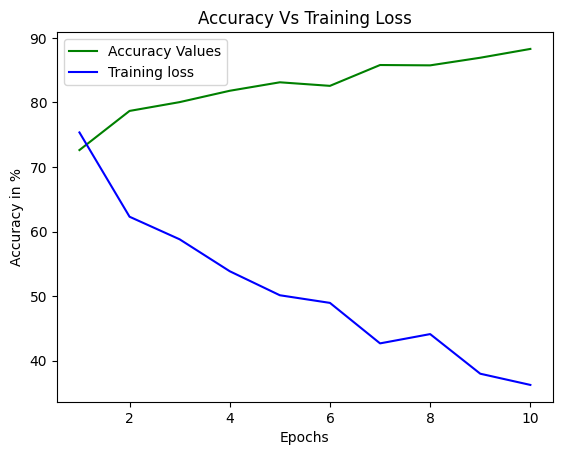

In [53]:
epochvalues = range(1,11)
acc_val = accuracyvalues[:10]
train_loss = training_loss[:10]
plt.plot(epochvalues,acc_val,'g',label='Accuracy Values')
plt.plot(epochvalues,train_loss,'b',label='Training loss')
plt.title('Accuracy Vs Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

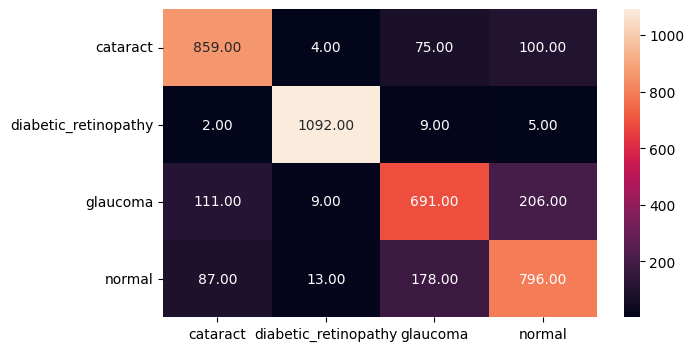

In [54]:
#Plotting Confusion Matrix
df_cm = pd.DataFrame(fold_con_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True,fmt='.2f')
plt.savefig('output.png')